In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json

# Cargamos los archivos

In [177]:
# Creamos el DataFrame global
df_combined = pd.DataFrame()

for archivo in os.listdir("resultsTransfer"):
    if os.path.splitext(archivo)[1] == ".csv":

        if os.path.splitext(archivo)[0] != "resultadosTransfer" and os.path.splitext(archivo)[0] != "resultados_Not_Transfer" and os.path.splitext(archivo)[0] != "resultadosTransfer_totalMerged":

            df_partial = pd.read_csv(f"resultsTransfer/{archivo}")

            df_partial_mean = pd.DataFrame({f'{archivo.split("resultadosTransfer_")[1].split(".csv")[0]}' : df_partial.iloc[:,1:].mean()}).T

            df_combined = pd.concat([df_combined, df_partial_mean])


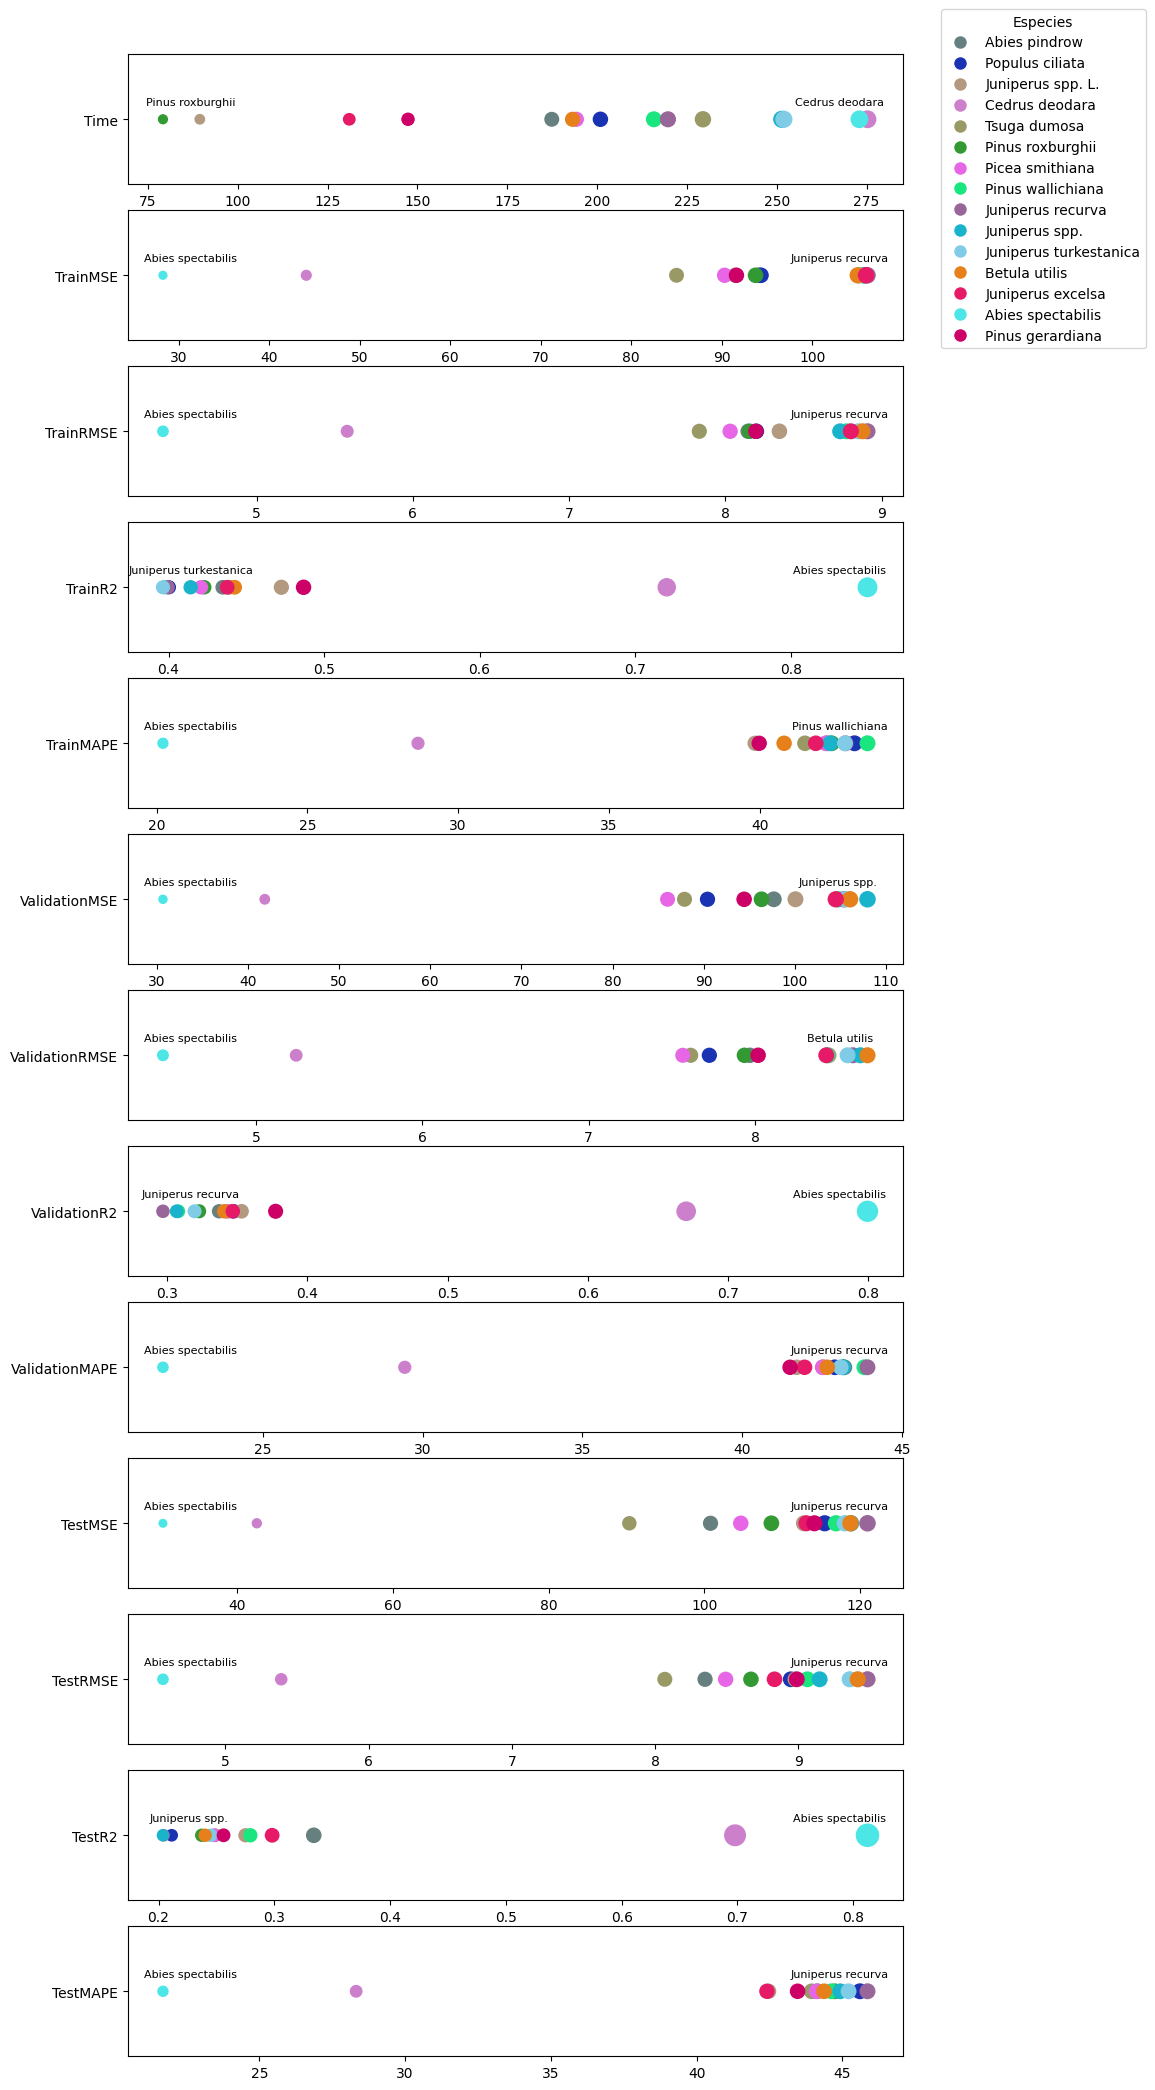

In [181]:
# Asociamos los colores
colors = []
for color in range(df_combined.shape[0]):
    r = np.round(np.random.rand(),1)
    g = np.round(np.random.rand(),1)
    b = np.round(np.random.rand(),1)

    colors.append([r,g,b])


# Número de columnas
num_cols = df_combined.shape[1]

# Creamos los subplots
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(10, 2 * num_cols))

# Reducimos la separación entre graficos
# plt.subplots_adjust(hspace=0.1)

# Creamos el gráfico
for i, ax in enumerate(axes):

    ax.scatter(x=df_combined.iloc[:, i], y=[df_combined.columns[i]] * len(df_combined),
               marker="o", 
               s=(df_combined.iloc[:, i] / df_combined.iloc[:, i].mean()) * 100, # Calculamos el tamaño de cada punto en función de la media de la columna
               c=colors, 
               label=df_combined.columns[i])
    
    # Valor de la columna
    column_values = df_combined.iloc[:, i]

    # Encontrar los valores mínimo y máximo
    max_value = column_values.max()
    min_value = column_values.min()
    
    # Obtener los nombres asociados (asumido como índice del DataFrame)
    max_name = df_combined.index[column_values == max_value][0]
    min_name = df_combined.index[column_values == min_value][0]
    
    # Añadir texto sobre los puntos máximo y mínimo
    ax.annotate(f"{max_name}", xy=(max_value, df_combined.columns[i]), xytext=(-20, 10), textcoords='offset points',
                ha='center', fontsize=8)
    ax.annotate(f"{min_name}", xy=(min_value, df_combined.columns[i]), xytext=(20, 10), textcoords='offset points',
                ha='center', fontsize=8)
    


# Configurar las etiquetas y el título
# plt.tight_layout(rect=[0, 0, 1, 0.96])

# Agregar la leyenda con las especies y sus colores correspondientes
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=species)
           for i, species in enumerate(df_combined.index)]
fig.legend(handles=handles, loc='upper right', title='Especies', bbox_to_anchor=(1.15, 0.9))

plt.show()

# Pruebas gráficas

In [ ]:
df_1 = pd.read_csv("resultadosTransfer_Abies pindrow.csv")
df_2 = pd.read_csv("resultadosTransfer_Betula utilis.csv")
df_3 = pd.read_csv("resultadosTransfer_Cedrus deodara.csv")

df_1_columns = pd.DataFrame({"Spectabilis": df_1.iloc[:,1:].mean()}).T
df_2_columns = pd.DataFrame({"Pindrow": df_2.iloc[:,1:].mean()}).T
df_3_columns = pd.DataFrame({"Utilis": df_3.iloc[:,1:].mean()}).T

df_combined = pd.concat([df_1_columns, df_2_columns, df_3_columns])
df_combined

/tmp/ipykernel_2121278/2328285146.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


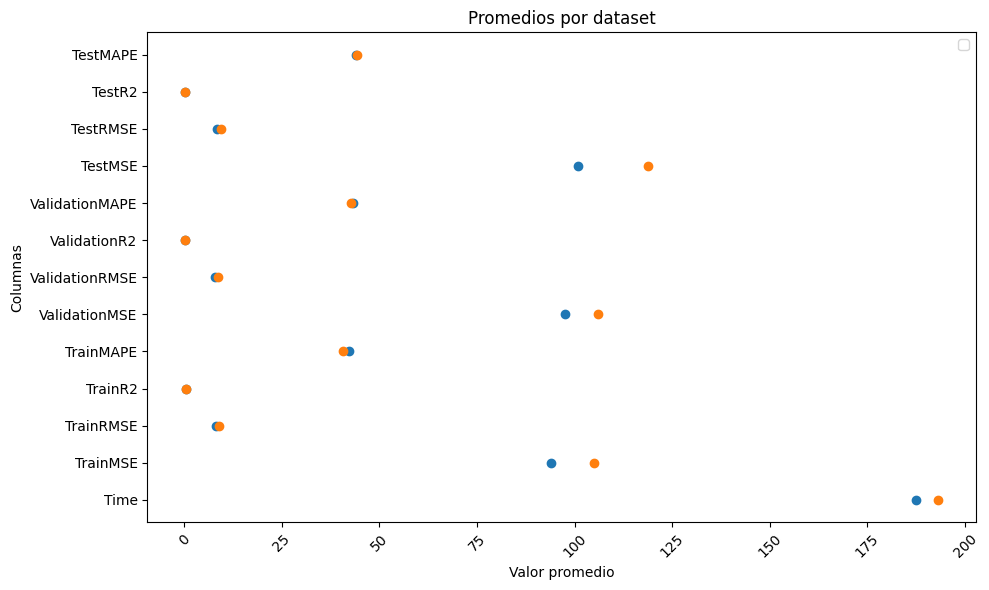

In [29]:
# Creamos el gráfico
plt.figure(figsize=(10,6))

# Creamos el gráfico
plt.scatter(df_1.iloc[:,1:].mean(), df_1.iloc[:,1:].mean().index, marker = "o")
plt.scatter(df_2.iloc[:,1:].mean(), df_2.iloc[:,1:].mean().index, marker = "o")

# Configurar las etiquetas y el título
plt.ylabel('Columnas')
plt.xlabel('Valor promedio')
plt.title('Promedios por dataset')
plt.legend()
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


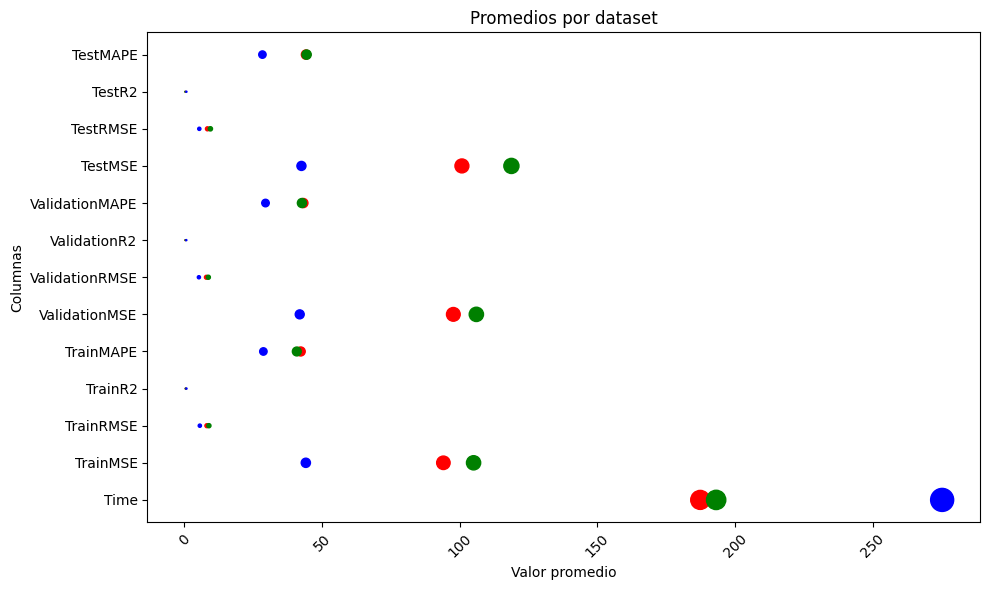

In [95]:
# Asociamos los colores
colors = ['red', 'green', 'blue']

# Creamos el gráfico
plt.figure(figsize=(10,6))

# Creamos el gráfico
for i in range(df_combined.shape[1]):
    plt.scatter(x = df_combined.iloc[:,i], y = [df_combined.columns[i]] * len(df_combined), marker = "o", 
                label = df_combined.columns[i], s = df_combined.iloc[:,i], c = colors)

# Configurar las etiquetas y el título
plt.ylabel('Columnas')
plt.xlabel('Valor promedio')
plt.title('Promedios por dataset')
# plt.legend()
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()